# Lab 3 - Decision Trees

This assignment uses a dataset obtained from the JSE Data Archive that contains biological and self-reported activity traits of a sample of college students at a single university uploaded in 2013. The study associated with these data focused on exploring if a correspondence exists between eye color and and other traits. You will also be using eye color as the target/label in this lab.

FEATURE DESCRIPTIONS: 

<ul>
<li>Color (Blue, Brown, Green, Hazel, Other)
<li>Age (in years)
<li>YearinSchool (First, Second, Third, Fourth, Other)
<li>Height (in inches)
<li>Miles (distance from home town of student to Ames, IA) 
<li>Brothers (number of brothers)
<li>Sisters (number of sisters)
<li>CompTime (number of hours spent on computer per week)
<li>Exercise (whether the student exercises Yes or No)
<li>ExerTime (number of hours spent exercising per week)
<li>MusicCDs (number of music CDs student owns)
<li>PlayGames (number of hours spent playing games per week)
<li>WatchTV (number of hours spent watching TV per week
</ul>

https://ww2.amstat.org/publications/jse/jse_data_archive.htm (eyecolorgenderdata.csv)

Whole notebook collaborated with Fenglu, Hong, SID: 3031865656

In [0]:
from collections import Counter, defaultdict
from itertools import combinations 
import pandas as pd
import numpy as np
import operator

!wget http://people.ischool.berkeley.edu/~zp/course_datasets/eye_color.zip
!unzip eye_color.zip
!ls
 

--2019-02-21 05:18:35--  http://people.ischool.berkeley.edu/~zp/course_datasets/eye_color.zip
Resolving people.ischool.berkeley.edu (people.ischool.berkeley.edu)... 128.32.78.16
Connecting to people.ischool.berkeley.edu (people.ischool.berkeley.edu)|128.32.78.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23344 (23K) [application/zip]
Saving to: ‘eye_color.zip’

eye_color.zip       100%[===================>]  22.80K  --.-KB/s    in 0.07s   

2019-02-21 05:18:35 (310 KB/s) - ‘eye_color.zip’ saved [23344/23344]

Archive:  eye_color.zip
  inflating: Eye_Color.csv           
  inflating: Eye_Color_Dataset_Description.txt  
Eye_Color.csv  Eye_Color_Dataset_Description.txt  eye_color.zip  sample_data


In [0]:
df = pd.read_csv('Eye_Color.csv')

In [0]:
# remove NA's and reset the index
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df = df.reset_index(drop=True)

# Calculating Gini Index 



**Question 1: How many rows are there in the dataset for males? For females? **



In [0]:
# YOUR CODE HERE
df.groupby("gender").size()

gender
female    1078
male       910
dtype: int64

###Answer: There are 1078 rows in female and 910 rows in male

**Question 2: What is the Gini Index of this dataset, using males and females as the target classes?**

In [0]:
# YOUR CODE HERE
1-(1078/1988)**2-(910/1988)**2

0.4964292799047808

###Answer:0.4964292799047808

## Best Split of a Numeric Feature

**Question 3: What is the best split point of the 'height' feature. **

In [0]:
# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X=df[["height"]]
Y=df[["gender"]]
clf = DecisionTreeClassifier(max_depth=1)

clf = clf.fit(X, Y)

Y_pred =clf.predict(X)
clf.tree_.threshold


array([68.5, -2. , -2. ])

###Answer: 68.5###

**Question 4: What is the Gini Index of this best split?**

In [0]:
# YOUR CODE HERE
clf.tree_.__getstate__()['nodes']
1047.0/1988.0 *0.23446259 + 0.30009452 * 941.0/1988.0

0.2655288103873239

###Answer:0.2655288103873239

**Question 5: How much does this partitioning reduce the Gini Index over that of the overall dataset?**

In [0]:
# YOUR CODE HERE
0.4964292799047808-0.2655288103873239

0.2309004695174569

###Answer:0.2309004695174569

**Question 6: How many 'female' rows are below your best split point? 'male' rows?**

In [0]:
# YOUR CODE HERE
df[["gender","height"]].groupby("gender").agg(lambda x: (x<68.5).sum())

,height
gender,
female,905.0
male,142.0


###Answer: There are 905 rows of females and 142 rows of males are below the split point

**Question 7: How many 'female' rows are above your best split point? 'male' rows?**

Recall that, to calculate the best split of this numeric field, you'll need to order your data by 'height', then consider the midpoint between each pair of consecutive heights as a potential split point, then calculate the Gini Index for that partitioning. You'll want to keep track of the best split point and its Gini Index (remember that you are trying to minimize the Gini Index). 

There are a lot of ways to do this. Some are very fast, others very slow. One tip to make this run quickly is, as you consecutively step through the data and calculate the Gini Index of each possible split point, keep a running total of the number of rows for each candidate that are located above and below the split point. 

Some Python tips: 

* Counter(), from the collections module, is a special dictionary for counting values of a key
* zip() lets you concatenate lists into a list of tuples (for example, if we have a list of the candidates and a list of transaction amounts, zip(candidate_list, transaction_amount) would give us a list of (candidate, transaction amount) pairs

In [0]:
# YOUR CODE HERE
df[["gender","height"]].groupby("gender").agg(lambda x: (x>68.5).sum())

,height
gender,
female,173.0
male,768.0


###Answer: There are 173 rows of female above the best split point and 768 rows of male above the best split point

## Best Split of a Categorial Variable

**Question 8: How many possible splits are there of the eyecolor feature?**

In [0]:
from scipy.special import comb
df["eyecolor"].unique()

comb(5,1)+comb(5,2)
# YOUR CODE HERE

15.0

###Answer: 15

**Question 9: Which split of eyecolor best splits the female and male rows, as measured by the Gini Index?**

In [0]:
# YOUR CODE HERE

def compute_gini(d1, d2):
  d = d1 + d2
  return 1 - (d1*1.0/d)**2 - (d2*1.0/d)**2

f = 1078
m = 910
best_gini = 1
best_split = []
colors = df['eyecolor'].unique()

def compute(x,i,j):
   return x

for i in colors:
  for j in colors:
    f_left = df[["gender","eyecolor"]].groupby("gender").agg(lambda x: ((x==i) | (x==j)).sum()).iloc[0][0]
    f_right = f - f_left
    m_left = df[["gender","eyecolor"]].groupby("gender").agg(lambda x: ((x==i) | (x==j)).sum()).iloc[1][0]
    m_right = m - m_left
    left = df[["eyecolor"]].agg(lambda x: ((x==i) | (x==j)).sum()).values.item(0)
    right = 1988 - left
    gini_left = compute_gini(f_left, m_left)
    gini_right = compute_gini(f_right, m_right)
    gini = left*1.0/1988*gini_left + right*1.0/1988*gini_right
    if gini < best_gini:
      best_gini = gini
      best_split = [i, j]
best_split, best_gini

(['green', 'green'], 0.4930915729509777)

###Answer: the best split color is the color green

**Question 10: What is the Gini Index of this best split?**

In [0]:
# YOUR CODE HERE
best_gini

0.4930915729509777

###Answer:0.4930915729509777

**Question 11: How much does this partitioning reduce the Gini Index over that of the overall data set?**

In [0]:
# YOUR CODE HERE
0.4964292799047808-0.4930915729509777

0.003337706953803088

###Answer:0.003337706953803088###

**Question 12: How many 'female' rows and 'male' rows are in your first partition? How many 'female' rows and 'male' rows are in your second partition?**

Python tip: the combinations function of the itertools module allows you to enumerate combinations of a list. You might want to Google 'power set'.

In [0]:
# YOUR CODE HERE
part=df[["gender","eyecolor"]].groupby("gender").agg(lambda x: ((x=="green") | (x=="green")).sum()).reset_index().rename({"eyecolor": "first_partition"}, axis='columns')
part["second_partition"]=[1078-190, 910-107]
part

,gender,first_partition,second_partition
0,female,190,888
1,male,107,803


###Answer: There are 190 female in the first partition and 999 male in the second partition. There are 107 female in the second partition and 803 male in the second partition.

## Training a decision tree

**Question 13: Using all of the features in the original dataframe read in at the top of this notebook, train a decision tree classifier that has a depth of three (including the root node and leaf nodes). What is the accuracy of this classifier on the training data?**

Scikit-learn classifiers require class labels and features to be in numeric arrays. As such, you will need to turn your categorical features into numeric arrays using DictVectorizer. This is a helpful notebook for understanding how to do this: http://nbviewer.ipython.org/gist/sarguido/7423289. You can turn a pandas dataframe of features into a dictionary of the form needed by DictVectorizer by using df.to_dict('records'). Make sure you remove the class label first (in this case, gender). If you use the class label as a feature, your classifier will have a training accuracy of 100%! The example notebook link also shows how to turn your class labels into a numeric array using sklearn.preprocessing.LabelEncoder().

In [0]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer #to turn categorial variables into numeric arrays
from sklearn import preprocessing #to transform the feature labels


tree1 = preprocessing.LabelEncoder()
tree1.fit(['first', 'third', 'fourth', 'second', 'other','first"'])
year=tree1.transform(df["year"])
 
 
tree2 = preprocessing.LabelEncoder()
tree2.fit(['hazel', 'brown', 'green', 'blue', 'other'])
eyecolor=tree2.transform(df["eyecolor"])


tree3 = preprocessing.LabelEncoder()
tree3.fit(['Yes', 'No'])
exercise=tree3.transform(df["exercise"])

df2=df.copy()
df2["year"]=year
df2["eyecolor"]=eyecolor
df2["exercise"]=exercise
df2=df2.drop(["gender"],axis=1)
clf2 = DecisionTreeClassifier(splitter= "best",max_depth=3)

clf2 = clf2.fit(df2, df["gender"])

Y_pred2 =clf2.predict(df2)
print(accuracy_score(df["gender"],Y_pred2))


0.8646881287726358


**Question 14: Using the following code snippet, export your decision tree to graphviz and visualize it. In your write-up, write down the interpretation of the rule at each node which is used to perform the splitting.**

In order to install graphviz, you may need to download the tool from [this website](https://graphviz.gitlab.io), and then pip3/conda install the python libraries you do not have.

Mac users can use ```brew install graphviz``` instead of following the link, and linux users can do the same using their favourite package manager (for example, Ubuntu users can use ```sudo apt-get install graphviz```, followed by the necessary pip3/conda installations.

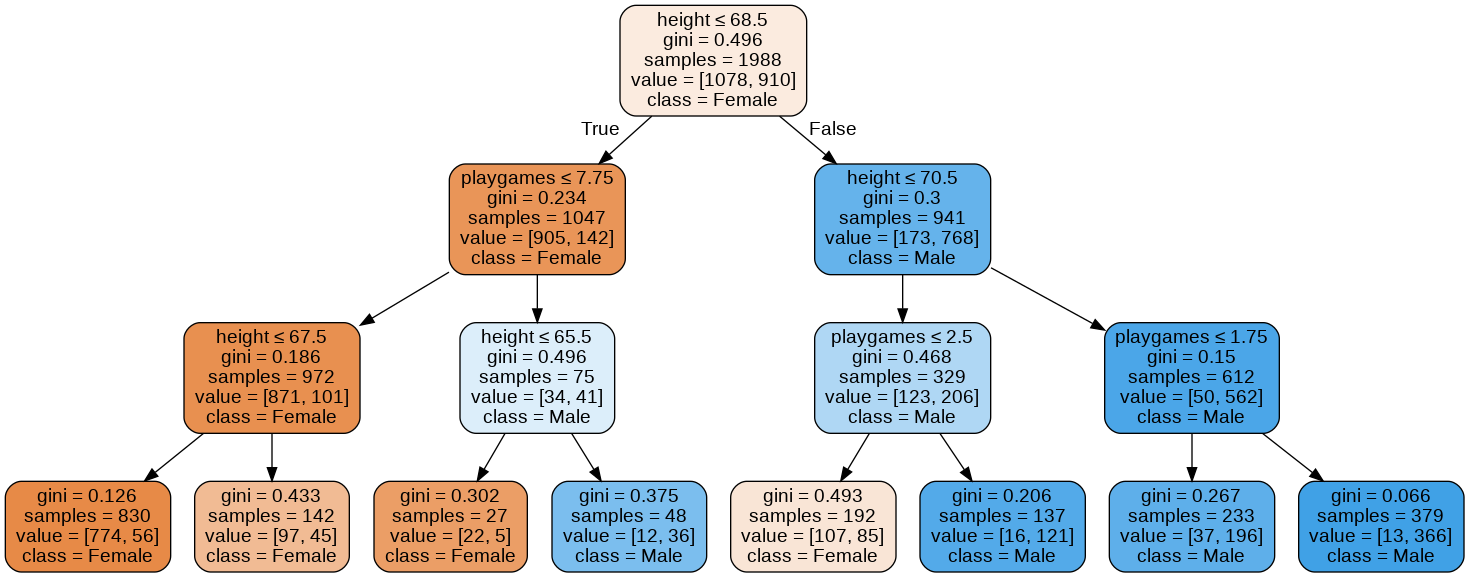

In [0]:
from IPython.display import Image  
import pydotplus 
import pydot
from sklearn.externals.six import StringIO
#
clf = clf2

dotfile = StringIO() 
sklearn.tree.export_graphviz(clf, out_file=dotfile,
                     feature_names=df2.columns,  
                         class_names=['Female', 'Male'],  
                         filled=True, rounded=True,  
                         special_characters=True)
                    
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
Image(graph.create_png())

###Write up: 
Depth = 0 
      
      Rule: split on height: split point is whether the height is less than 68.5 


Depth =1 
 
      Rule(Left): If the height is less or equal to 68.5 (True), split by the hours of playgames, Split point is whether the "playgames" feature is less or equal to 7.75

     Rule(Right): If the height is more than 68.5 (False), split by the height again, Split point is whether the height is less or equal to 70.5
                  
     
 Depth = 2 
      
      Rule(Left): If playgame <=7.5, (true),  split point is the height is less or equal to 67.5 (True)
      Rule(Left): If playgame >7.5, (false), split point is height <=65.5
      Rule(Right): If height <=70.5 (True), split point is playgames <=2.5
      Rule (Right): If height >70.5 (False), split point is playgames <=1.75
      
 Depth = 3
      
      Classify
                        

###

**Question 15 (Extra Credit): For each of your leaf nodes, specify the percentage of 'female' rows in that node (out of the total number of rows at that node).**

See this notebook for the basics of training a decision tree in scikit-learn and exporting the outputs to view in graphviz: http://nbviewer.ipython.org/gist/tebarkley/b68c04d9b31e64ce6023

In [0]:
print("1st node: ", 774/830)
print("2nd node: ", 97/142)
print("3rd node: ", 22/27)
print("4th node: ", 12/48)
print("5th node: ", 107/192)
print("6th node: ", 16/137)
print("7th node: ", 37/233)
print("8th node: ", 13/379)

1st node:  0.9325301204819277
2nd node:  0.6830985915492958
3rd node:  0.8148148148148148
4th node:  0.25
5th node:  0.5572916666666666
6th node:  0.11678832116788321
7th node:  0.15879828326180256
8th node:  0.03430079155672823
